In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
#matplotlib.use('TkAgg')
import math
import warnings 
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__) 

3.3.2
0.11.0


In [98]:
AllExp = pd.read_csv('AllExp.csv')
AllExp = AllExp.loc[AllExp[' num_of_fam']<=910].copy()
AllExp = AllExp.loc[AllExp['E(J)']<=999].copy()

In [99]:
AllMc0 = pd.read_csv('AllMc0.csv')

In [100]:
# Вычисляем расстояние до энергитического центра
def Create_Distance(X, Y):
    R = (X*X+Y*Y)**0.5
    return R

In [101]:
#Добавляем расстояние в ДатаФрейм
AllExp['R'] = Create_Distance(AllExp['X(J)'].values, AllExp['Y(J)'].values)
AllMc0['R'] = Create_Distance(AllMc0['X(J)'].values, AllMc0['Y(J)'].values)
AllExp = AllExp[AllExp['R']<15].copy()
AllMc0 = AllMc0[AllMc0['R']<15].copy()

In [7]:
#pip install --upgrade ipykernel

In [5]:
def Create_colors(particle_energy):
    array = plt.hist(particle_energy, bins = 50)
    
    x = []
    
    s_energy=sorted(particle_energy, reverse = True)
    count = 1
    j=0
    tmp = np.random.random((1, 3))
    for i in range(len(s_energy)):
        while int(array[0][j]) == 0:
            j = j+1
        
        if count < int(array[0][j]):
            x.append(tmp)
            count = count + 1      
        else:
            j = j + 1
            x.append(tmp)
            tmp = np.random.random((1, 3))
            count = 1
    
    m = []
    for i in range(len(x)):
        m.append(abs(x[i][0]))
    
    return m, array 

In [5]:
#yes=sns.distplot(X_coordinate, bins = 20, kde = 0, axlabel= 'значение X')
#array = plt.hist(particle_energy, bins = 100)
#k = sns.distplot(particle_energy, bins = 20, kde = 0, axlabel= 'значение X')
#k.text (-15, -10, u'backgroundcolor="yellow"', backgroundcolor=c[0])
#k.text (0.1, 1.1, u'color="blue"', color="blue")
#k.text (1.4, 1.0, u'color="r"', color="r")
#for i in range(len(array))
#color = sns.color_palette()[5]

In [6]:
from itertools import product


def Create_Graph(X_coordinate, Y_coordinate, m):
    sns.set(style="whitegrid")
    g = sns.jointplot(X_coordinate, Y_coordinate,xlim=(0, 30), ylim=(0, 30), kind="scatter",color='b', height=8)
    #Clear the axes containing the scatter plot
    g.ax_joint.cla()
    
    c=np.random.random((len(m), 3))
    plt.sca(g.ax_joint)
    #markers = ['x','o']*len(particle_energy)
    plt.scatter(X_coordinate, Y_coordinate, c = m, alpha = 0.6)

In [7]:
def Create_Hist(particle_energy, co, array, X, Y, STEP):
    k = sns.distplot(particle_energy, bins = 20, kde = 0, axlabel= 'значение E для модели')
    s=0
    y = Y
    
    for i in range(len(array[0])):
        n = int(array[0][i])
        left = round(array[1][i], 2)
        right = round(array[1][i+1], 2)
        s = s + int(array[0][i])
        color = co[s-1]
        n_col = "white"
        if i>=1 and i<=5:
            n_col = "black"
        if n!=0:
            x = X
            y = y - STEP
            k.text (x, y, f'n = {n} in ( {left} , {right})',color=n_col,  backgroundcolor=color)

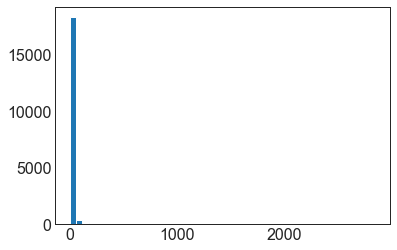

In [8]:
m, arrayExp = Create_colors(AllExp['E(J)'])

D:\Anaconda\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


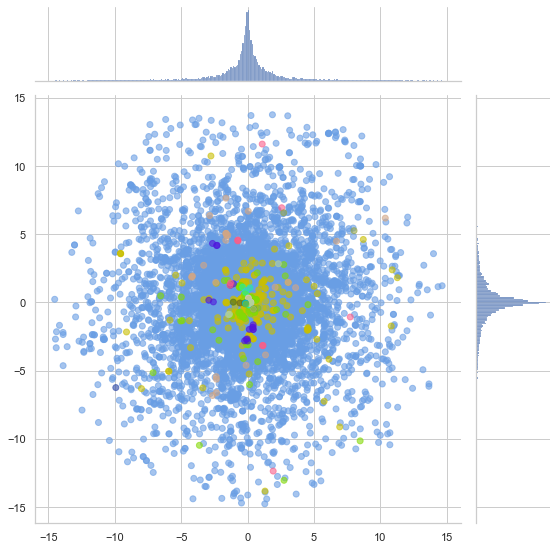

In [16]:
Create_Graph(AllExp['X(J)'], AllExp['Y(J)'], m)

D:\Anaconda\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


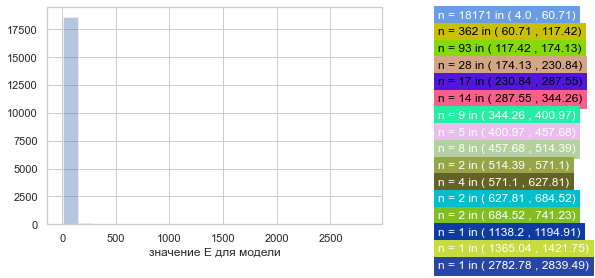

In [18]:
Y = 20000
X =  3500 
STEP =  1500 # exp
Create_Hist(AllExp['E(J)'], m, arrayExp, X, Y, STEP)

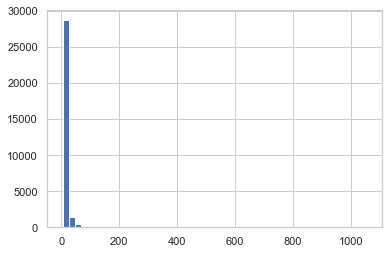

In [19]:
p, arrayMc0 = Create_colors(AllMc0['E(J)'])

D:\Anaconda\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


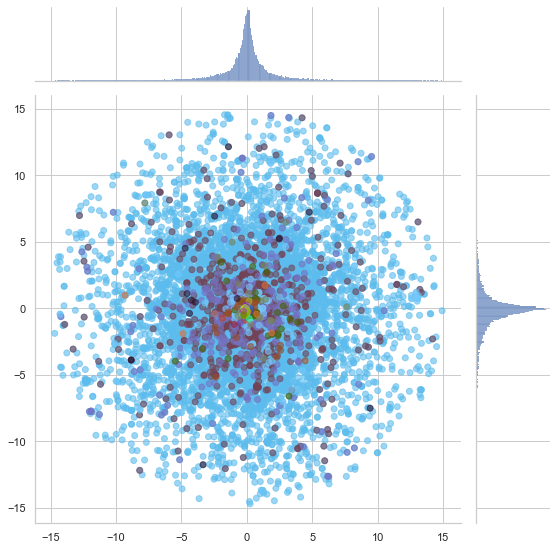

In [20]:
Create_Graph(AllMc0['X(J)'], AllMc0['Y(J)'], p)

D:\Anaconda\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


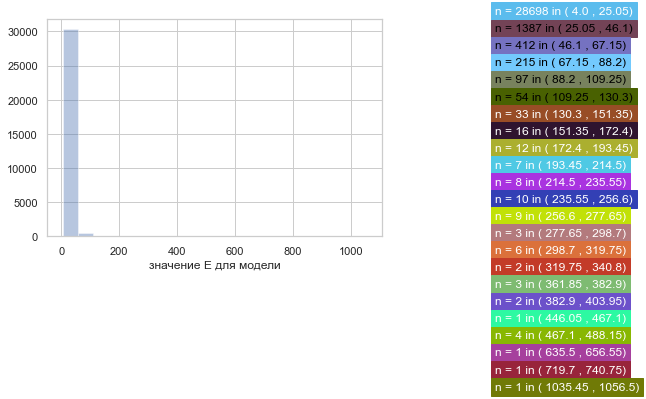

In [22]:
Y = 35000 
X = 1500 
STEP =  2500

Create_Hist(AllMc0['E(J)'], p,arrayMc0, X, Y, STEP)

In [90]:
# Все семейства в 3д с осью уровнем энергии
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode()

fig1 = go.Scatter3d(x=AllExp['X(J)'],
                    y=AllExp['Y(J)'],
                    z=AllExp['E(J)'],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="X coordinate"),
                                yaxis=dict( title="Y coordinate"),
                                zaxis=dict(title= "E energy")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("3DPlotAll.html"))

'3DPlotAll.html'

In [92]:
# Только несколько семейств
dt = AllExp[AllExp[' num_of_fam'] <= 5]

fig1 = go.Scatter3d(x=dt['X(J)'],
                    y=dt['Y(J)'],
                    z=dt['E(J)'],
                    mode='markers',
    marker=dict(
        size=30,
        color=dt['E(J)'],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
                   )

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="X coordinate"),
                                yaxis=dict( title="Y coordinate"),
                                zaxis=dict(title= "E energy")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("3DPlot.html"))

'3DPlot.html'

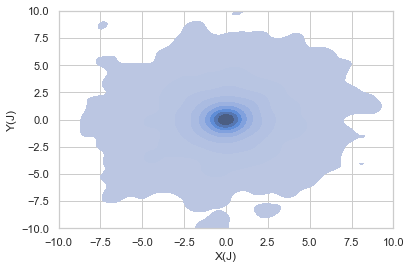

In [110]:
ax = sns.kdeplot(AllExp['X(J)'], AllExp['Y(J)'], fill = True)
ax.patch.set_facecolor('white')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [89]:
import chart_studio.plotly as py
import plotly.figure_factory as ff

import numpy as np


#dt = AllExp[AllExp[' num_of_fam'] == 5]

#dt = AllExp[AllExp[' num_of_fam'] <= 50].copy()
dt = AllExp.copy()

x = dt['X(J)']
y = dt['Y(J)']

colorscale = ['#7A4579', '#D56073', '#7FFFD4', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]

fig = ff.create_2d_density(
    x, y, colorscale=colorscale, ncontours = 10,
    hist_color='rgb(255, 237, 222)', point_size=3
)

plotly.offline.plot({"data": fig},
                     auto_open=True,
                     filename=("2DPlotAll.html"))

'2DPlotAll.html'

In [20]:
#py.iplot(fig, filename='histogram_subplots')

In [52]:
positions = np.vstack([x.ravel(), y.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, x.shape)

In [88]:
# Все семейства в 3д с осью плотностью, посчитанной выше не как частота, а как что-то вроде гауссиана
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode()

fig2 = go.Scatter3d(x=x,
                    y=y,
                    z=Z,
                    mode='markers',
                   marker=dict(size=12,
                               color=Z,                
                               colorscale='Viridis',   
                               opacity=0.8) )

#Make Plot.ly Layout
mylayout2 = go.Layout(scene=dict(xaxis=dict( title="X coordinate"),
                                yaxis=dict( title="Y coordinate"),
                                zaxis=dict(title= "Density")),)

#Plot and save html
plotly.offline.plot({"data": [fig2],
                     "layout": mylayout2},
                     auto_open=True,
                     filename=("3DPlotDens.html"))

'3DPlotDens.html'